## CBOE Fundamental data requests

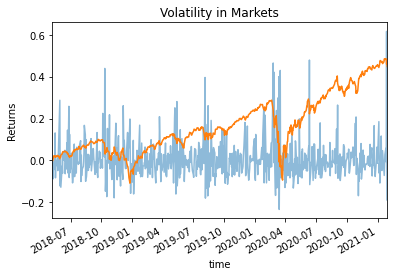

In [7]:
from QuantConnect.Data.Custom.Fred import *
from QuantConnect.Data.Custom.CBOE import *

qb = QuantBook()
vix = qb.AddData(CBOE, "VIX")
spy = qb.AddEquity("SPY", Resolution.Daily)

vix_history = qb.History(CBOE, vix.Symbol, timedelta(days=1000))
spy_history = qb.History(spy.Symbol, timedelta(days=1000), Resolution.Daily)

# drop the Symbol index from multi-index dataframe
vix_history = vix_history.reset_index(level=0, drop=True)
spy_history = spy_history.reset_index(level=0, drop=True)

# Chart formatting
plt.title('Volatility in Markets')
plt.xlabel('Time')
plt.ylabel('Returns')

# Plot the percent change in daily close values of VIX and SPY
vix_history['close'].pct_change().plot(alpha=0.5) # Increase transparency of VIX plot
spy_history['close'].pct_change().cumsum().plot()

In [8]:
qb = QuantBook()
resolution = Resolution.Hour
windowlength = 10
historylength = 24 * 30
symbol = qb.AddForex('EURUSD', resolution).Symbol
h = qb.History([symbol], historylength, resolution).close.unstack(level=0).dropna()

none:107: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


           0
0   0.027233
1   0.006912
2   0.061993
3   0.067772
4   0.011788
5   0.039045
6   0.026694
7   0.005651
8   0.035502
9   0.009912
10  0.023967
11  0.093164
12  0.002019
13  0.006114
14  0.000174
15  0.000408
16  0.030148
17  0.096025
18  0.025690
19  0.142081
20  0.140119
21  0.145626
22  0.015345
23  0.007772


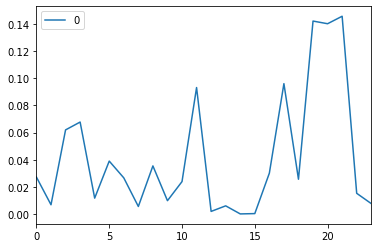

In [9]:
zscore = lambda x: (x[-1] - x.mean()) / x.std()

h['zscore'] = h['EURUSD'].rolling(windowlength).apply(zscore)
results = []
for n in range(0,24):
    results.append( h['zscore'].between_time(str(n) + ':00', str(n) + ':59').mean() ** 2)

df = pd.DataFrame(results)
print(df)
df.plot()

In [10]:
# The official interest rate comes from Quandl
from QuantConnect.Python import PythonQuandl
from NodaTime import DateTimeZone

class QuandlRate(PythonQuandl):
    def __init__(self):
        self.ValueColumnName = 'BCB/17900'
        
tickers = ["USDEUR", "USDZAR", "USDAUD",
                   "USDJPY", "USDTRY", "USDINR", 
                   "USDCNY", "USDMXN", "USDCAD"]
        
rate_symbols = ["BCB/17900",  # Euro Area 
                        "BCB/17906",  # South Africa
                        "BCB/17880",  # Australia
                        "BCB/17903",  # Japan
                        "BCB/17907",  # Turkey
                        "BCB/17901",  # India
                        "BCB/17899",  # China
                        "BCB/17904",  # Mexico
                        "BCB/17881"]  # Canada
       
symbols = {}
for i in range(len(tickers)):
    symbol = qb.AddForex(tickers[i], Resolution.Daily, Market.Oanda).Symbol
    qb.AddData(QuandlRate, rate_symbols[i], Resolution.Daily, DateTimeZone.Utc, True)
    symbols[str(symbol)] = rate_symbols[i]
            

Bundesbank 10Y Yield federal Bond

https://www.quandl.com/data/BUNDESBANK/BBK01_WT1010-Daily-Yield-Of-The-Current-10-Year-Federal-Bond

In [12]:
class QuandlCustomColumns(PythonQuandl):
    '''Custom quandl data type for setting customized value column name. Value column is used for the primary trading calculations and charting.'''
    def __init__(self):        
        self.ValueColumnName = "Value"

qb = QuantBook()
quandlCode = "BUNDESBANK/BBK01_WT1010"
gold = qb.AddData(QuandlCustomColumns, quandlCode, Resolution.Daily)

history = qb.History(qb.Securities.Keys, 360, Resolution.Daily)           
print(history.loc["BUNDESBANK/BBK01_WT1010"])

            value
time             
2020-02-06  -0.37
2020-02-06  -0.37
2020-02-07  -0.36
2020-02-07  -0.36
2020-02-08  -0.39
...           ...
2021-01-27  -0.54
2021-01-28  -0.54
2021-01-28  -0.54
2021-01-29  -0.55
2021-01-29  -0.55

[498 rows x 1 columns]
